In [3]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
#show the first training example
print(f"Training Sample:\n{train_data[0]}\n")
print(f"Training label:\n{train_labels[0]}")

Training Sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [5]:
train_data.shape

(60000, 28, 28)

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

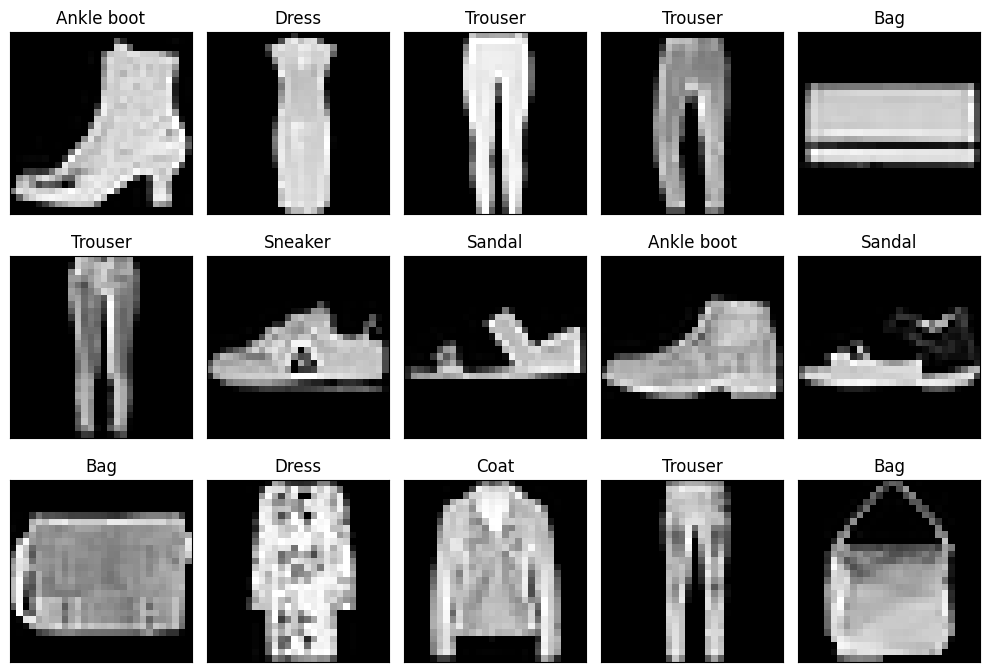

In [7]:
import matplotlib.pyplot as plt
import random
plt.figure(figsize=(10,7))
for i in range(15):
  plt.subplot(3,5,i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.xticks([]);
  plt.yticks([]);
  plt.grid()
  plt.imshow(train_data[rand_index], cmap='gray')
  plt.title(class_names[train_labels[rand_index]])
plt.tight_layout()
plt.show()

In [8]:
#set the random seed
tf.random.set_seed(36)

#create the model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation= tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation = "softmax")
])

#compile
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics = ["Accuracy"])

#fit the model
no_norm_history = model.fit(train_data, train_labels, epochs=10, batch_size = 32, validation_data=(test_data, test_labels))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - Accuracy: 0.1013 - loss: 3.0614 - val_Accuracy: 0.1132 - val_loss: 2.2726
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - Accuracy: 0.1180 - loss: 2.2614 - val_Accuracy: 0.1183 - val_loss: 2.2595
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - Accuracy: 0.1255 - loss: 2.2415 - val_Accuracy: 0.1593 - val_loss: 2.1938
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - Accuracy: 0.1577 - loss: 2.1587 - val_Accuracy: 0.2259 - val_loss: 1.8386
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - Accuracy: 0.2185 - loss: 1.7896 - val_Accuracy: 0.2749 - val_loss: 1.7053
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - Accuracy: 0.2741 - loss: 1.6947 - val_Accuracy: 0.2938 - val_loss: 1.6557
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - Accuracy: 0.2933 - loss: 1.6448 - val_Accuracy: 0.3001 - val_loss: 1.6259
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - Accuracy: 0.2948 - loss: 1.6202 

In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4)              │         3,140 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │            50 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,632 (37.63 KB)

 Trainable params: 3,210 (12.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,422 (25.09 KB)

In [10]:
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0
train_data_norm.min(), train_data_norm.max()

(np.float64(0.0), np.float64(1.0))

In [11]:
print(train_data.max())

255


In [12]:
#set the random seed
tf.random.set_seed(42)

#create the model
model2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation= tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation = "softmax")
])

#compile
model2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics = ["Accuracy"])

#fit the model
norm_history = model2.fit(train_data_norm, train_labels,
                            epochs=5,
                            validation_data=(test_data_norm, test_labels))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - Accuracy: 0.3961 - loss: 1.5849 - val_Accuracy: 0.7207 - val_loss: 0.8172
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - Accuracy: 0.7313 - loss: 0.7691 - val_Accuracy: 0.7462 - val_loss: 0.7325
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - Accuracy: 0.7501 - loss: 0.7028 - val_Accuracy: 0.7549 - val_loss: 0.7073
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - Accuracy: 0.7600 - loss: 0.6760 - val_Accuracy: 0.7635 - val_loss: 0.6926
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - Accuracy: 0.7645 - loss: 0.6599 - val_Accuracy: 0.7672 - val_loss: 0.6829


<Axes: title={'center': 'Normalised data Results'}>

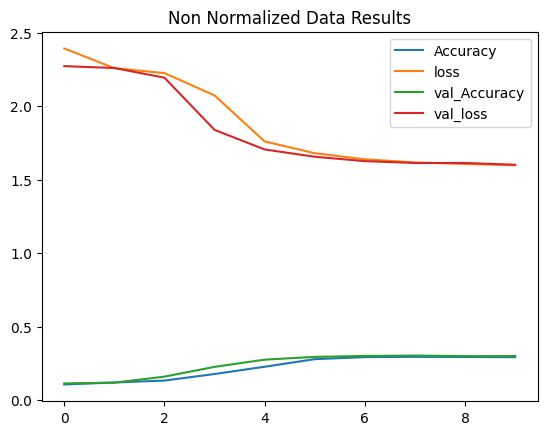

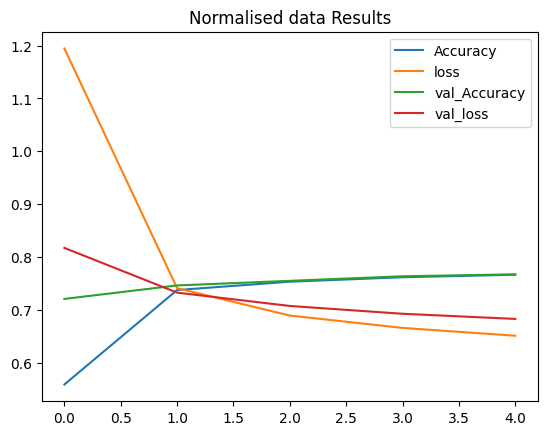

In [13]:
import pandas as pd
pd.DataFrame(no_norm_history.history).plot(title="Non Normalized Data Results")
pd.DataFrame(norm_history.history).plot(title="Normalised data Results")

In [14]:
#finding the ideal learning rate
from tensorflow.keras.callbacks import LearningRateScheduler
import math

tf.random.set_seed(42)
model3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics = ["Accuracy"])

#create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

#fit the model
find_lr_history = model3.fit(train_data_norm,
                             train_labels,
                             epochs = 40,
                             validation_data=(test_data_norm, test_labels),
                             callbacks=[lr_scheduler])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - Accuracy: 0.4764 - loss: 1.4335 - val_Accuracy: 0.7728 - val_loss: 0.6947 - learning_rate: 0.0010
Epoch 2/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - Accuracy: 0.7836 - loss: 0.6530 - val_Accuracy: 0.7920 - val_loss: 0.6261 - learning_rate: 0.0011
Epoch 3/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - Accuracy: 0.8007 - loss: 0.5948 - val_Accuracy: 0.7977 - val_loss: 0.5964 - learning_rate: 0.0013
Epoch 4/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - Accuracy: 0.8069 - loss: 0.5681 - val_Accuracy: 0.7992 - val_loss: 0.5793 - learning_rate: 0.0014
Epoch 5/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - Accuracy: 0.8106 - loss: 0.5522 - val_Accuracy: 0.8019 - val_loss: 0.5715 - learning_rate: 0.0016
Epoch 6/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - Accuracy: 0.8143 - loss: 0.5416 - val_Accuracy: 0.8028 - val_loss: 0.5659 - learning_rate: 0.0018
Epoch 7/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - Accuracy: 0.8161 - 

Text(0.5, 1.0, 'Finding the ideal learning rate')

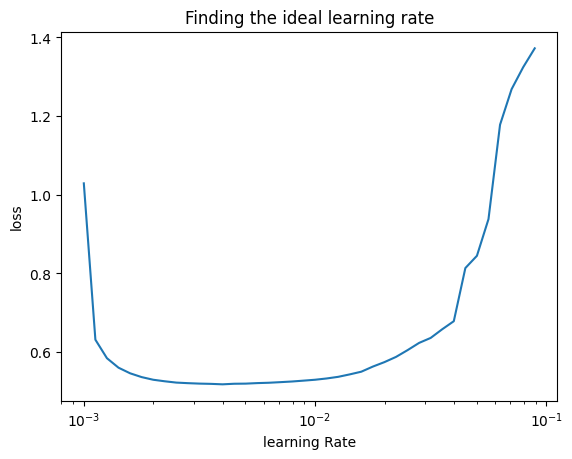

In [15]:
#plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt
lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("learning Rate")
plt.ylabel("loss")
plt.title("Finding the ideal learning rate")


In [16]:
tf.random.set_seed(42)
model4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model4.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics = ["Accuracy"])


#fit the model
history4 = model4.fit(train_data_norm,
                             train_labels,
                             epochs = 20,
                             validation_data=(test_data_norm, test_labels),
                             )

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - Accuracy: 0.4632 - loss: 1.4717 - val_Accuracy: 0.7341 - val_loss: 0.8055
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - Accuracy: 0.7486 - loss: 0.7584 - val_Accuracy: 0.7633 - val_loss: 0.7053
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - Accuracy: 0.7731 - loss: 0.6756 - val_Accuracy: 0.7768 - val_loss: 0.6601
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - Accuracy: 0.7871 - loss: 0.6341 - val_Accuracy: 0.7834 - val_loss: 0.6356
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - Accuracy: 0.7937 - loss: 0.6105 - val_Accuracy: 0.7876 - val_loss: 0.6200
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - Accuracy: 0.7989 - loss: 0.5941 - val_Accuracy: 0.7937 - val_loss: 0.6075
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - Accuracy: 0.8032 - loss: 0.5810 - val_Accuracy: 0.7967 - val_loss: 0.5996
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - Accuracy: 0.8057 - loss: 0.5721 -

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


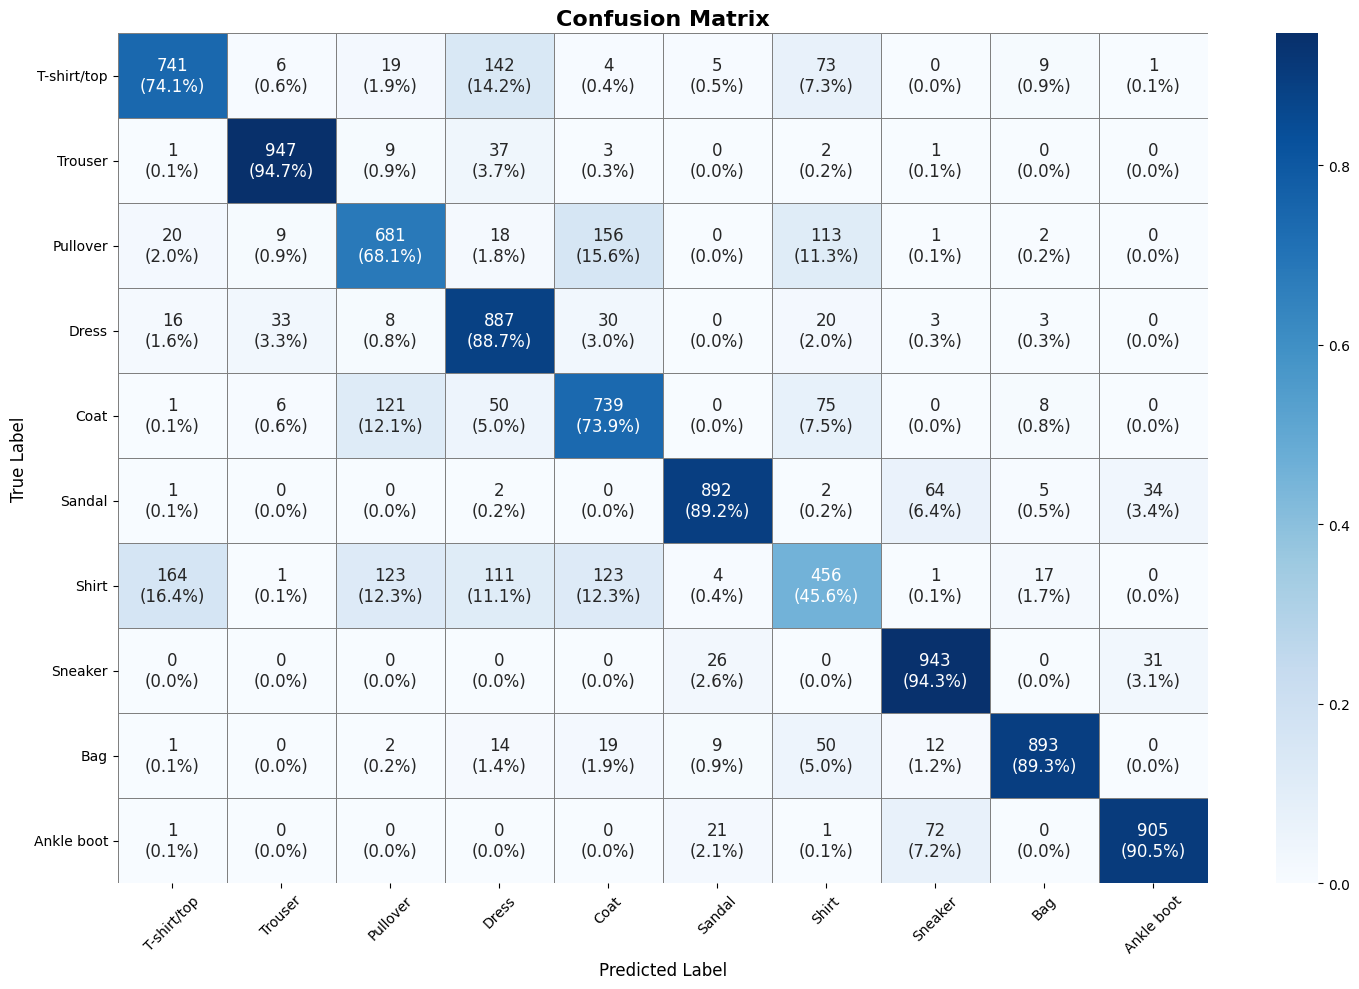

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

CLASS_NAMES = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

def make_confusion_matrix(model, X_test, y_true, class_names=CLASS_NAMES):
    """
    Plot a confusion matrix with both counts and percentages using a blue color palette.
    """
    y_pred_probs = model.predict(X_test)
    y_pred = np.argmax(y_pred_probs, axis=1)

    cm = confusion_matrix(y_true, y_pred)
    cm_sum = cm.sum(axis=1, keepdims=True)
    cm_percent = cm / cm_sum.astype(float)

    labels = np.asarray([
        [f"{count}\n({percent:.1%})" for count, percent in zip(row_counts, row_percents)]
        for row_counts, row_percents in zip(cm, cm_percent)
    ])

    plt.figure(figsize=(15, 10))
    sns.heatmap(cm_percent,
                annot=labels,
                fmt='',
                cmap='Blues',
                xticklabels=class_names,
                yticklabels=class_names,
                linewidths=0.5,
                linecolor='gray',
                cbar=True,
                annot_kws={"size": 12})

    plt.title("Confusion Matrix", fontsize=16, fontweight='bold')
    plt.xlabel("Predicted Label", fontsize=12)
    plt.ylabel("True Label", fontsize=12)
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()


make_confusion_matrix(model4, test_data_norm, test_labels)

In [18]:
#Visualize the results

import random

def plot_random_image(model, images, true_labels, class_names):
  i = random.randint(0, len(images))

  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1,28,28))
  pred_label = class_names[pred_probs.argmax()]
  true_label = class_names[true_labels[i]]

  plt.imshow(target_image, cmap="gray")

  if pred_label == true_label:
    color = "green"
  else:
    color = "red"



  plt.xlabel("Pred:{} {:2.0f}% (True: {})".format(pred_label,
                                                  100*tf.reduce_max(pred_probs),#tf.reduce_max returns the highest probability in that array
                                                  true_label),
             color = color)

In [19]:
def plotting_random_images(model, images, true_labels, class_names, num_images=8):
    plt.figure(figsize=(16, 10))

    for idx in range(num_images):
        i = random.randint(0, len(images))
        target_image = images[i]
        target_label = true_labels[i]

        pred_probs = model.predict(target_image.reshape(1, 28, 28), verbose=0)[0]
        pred_index = np.argmax(pred_probs)
        pred_label = class_names[pred_index]
        true_label = class_names[target_label]

        color = "green" if pred_label == true_label else "red"

        plt.subplot(2, 4, idx + 1)
        plt.imshow(target_image, cmap="gray")
        plt.axis("off")
        plt.title(
            f"Pred: {pred_label} {100 * pred_probs[pred_index]:.0f}%\nTrue: {true_label}",
            fontsize=10,
            color=color,
            loc="center",
            pad=10  # space between image and title
        )

    plt.tight_layout()
    plt.show()

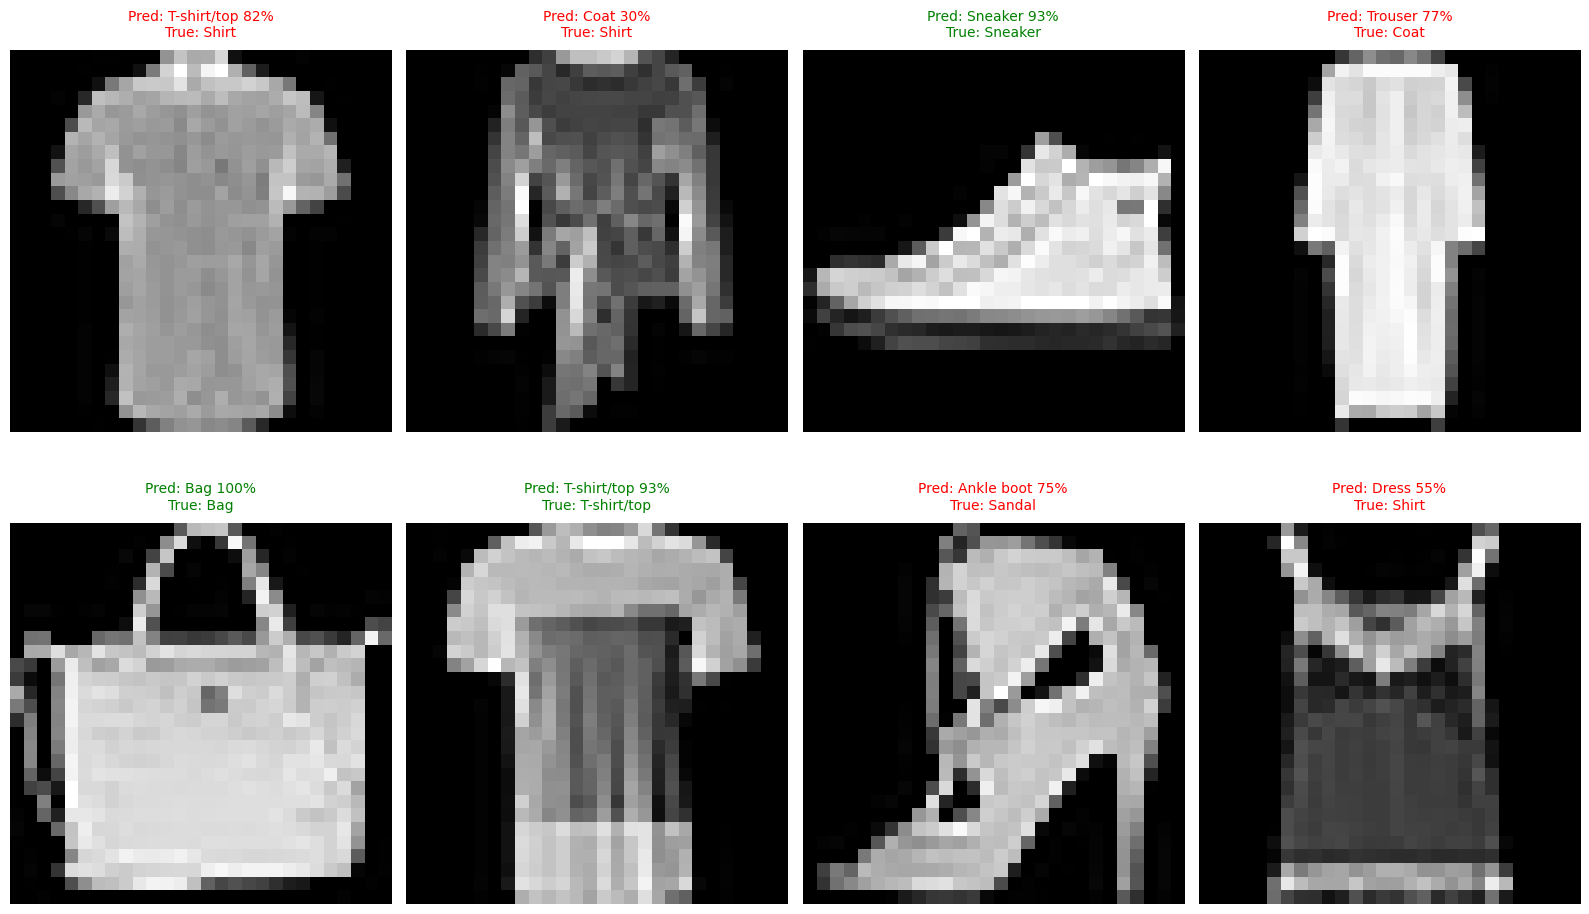

In [20]:
plotting_random_images(model = model4,
                  images = test_data_norm,
                  true_labels = test_labels,
                  class_names=class_names)


In [21]:
#finding the layers of our most recent model
model4.layers


[<Flatten name=flatten_3, built=True>,
 <Dense name=dense_9, built=True>,
 <Dense name=dense_10, built=True>,
 <Dense name=dense_11, built=True>]

In [22]:
weights, biases = model4.layers[1].get_weights()
weights, weights.shape, biases, biases.shape

(array([[ 0.31506678,  0.48086515, -0.41244552, -0.16814972],
        [ 0.3187885 , -0.01839344, -0.4611164 , -0.406864  ],
        [ 0.5678356 ,  0.6368611 , -0.2924394 , -0.9679425 ],
        ...,
        [-0.24205509, -0.26090324, -0.34926397, -0.56921846],
        [-0.1857457 , -0.03300102, -0.38947272,  0.00725592],
        [ 0.03366985,  0.453748  , -0.56397724, -0.27121964]],
       dtype=float32),
 (784, 4),
 array([ 0.26356915, -1.4849569 ,  1.4410272 , -0.1954197 ], dtype=float32),
 (4,))

In [23]:
model4.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 4)              │         3,140 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │            50 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,632 (37.63 KB)

 Trainable params: 3,210 (12.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,422 (25.09 KB)

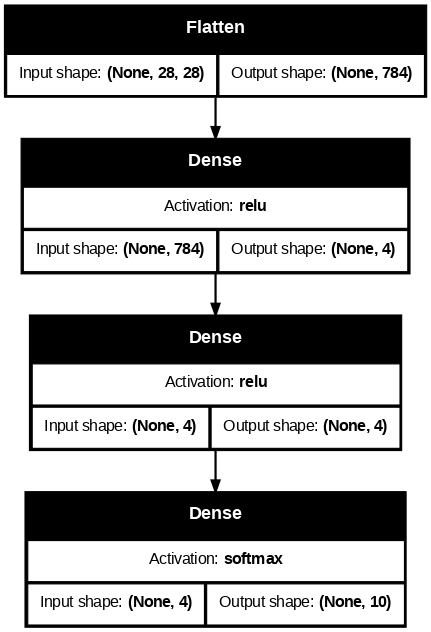

In [34]:
from tensorflow.keras.utils import plot_model
plot_model(model4, show_shapes = True, show_layer_names=False, expand_nested=False, show_layer_activations=True, dpi=80)
